In [1]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [2]:
pip install numpy<2


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [3]:
# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\varun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8816 - loss: 0.4099 - val_accuracy: 0.9603 - val_loss: 0.1287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9691 - loss: 0.1045 - val_accuracy: 0.9696 - val_loss: 0.0985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0697 - val_accuracy: 0.9751 - val_loss: 0.0787
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.9735 - val_loss: 0.0865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9868 - loss: 0.0390 - val_accuracy: 0.9731 - val_loss: 0.0837
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0312 - val_accuracy: 0.9749 - val_loss: 0.0875
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0278 - val_accuracy: 0.9769 - val_loss: 0.0855
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0195 -

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save("mnist_classifier.h5")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.1144


Test Accuracy: 0.977400004863739


In [7]:
import numpy as np

# Predict a single image
sample_image = x_test[0]  # Example: first test image
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 784)))

print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Label: 7


# 1. Use Convolutional Neural Networks (CNNs)
CNNs are highly effective for image classification tasks as they extract spatial features from the input data.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Normalize labels if needed
train_labels = train_labels.astype('int')
test_labels = test_labels.astype('int')

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

C:\Users\varun\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8810 - loss: 0.3614 - val_accuracy: 0.9848 - val_loss: 0.0530
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9853 - val_loss: 0.0504
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9905 - val_loss: 0.0334
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9898 - val_loss: 0.0333
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.9931 - loss: 0.0196 - val_accuracy: 0.9908 - val_loss: 0.0327
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9949 - loss: 0.0144 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9958 -

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator to the data
datagen.fit(train_images)

# Train the model with augmented data
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10)

C:\Users\varun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9636 - loss: 0.1226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9835 - loss: 0.0541
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9860 - loss: 0.0462
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9868 - loss: 0.0405
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9878 - loss: 0.0402
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9905 - loss: 0.0319
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9892 - loss: 0.0343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9902 - loss: 0.0334
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9908 - loss: 0.0292
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9906 - loss: 0.0289


In [11]:
pip install keras-tuner --upgrade


  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   ------------------ -------------------- 61.4/129.1 kB 544.7 kB/s eta 0:00:01
   ------------------------ -------------- 81.9/129.1 kB 762.6 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/129.1 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 582.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
from keras_tuner.tuners import RandomSearch


In [14]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', 64, 256, step=64), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='mnist'
)

tuner.search(train_images, train_labels, epochs=10, validation_split=0.1)


Trial 5 Complete [00h 04m 05s]
val_accuracy: 0.9838333129882812

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 40m 36s


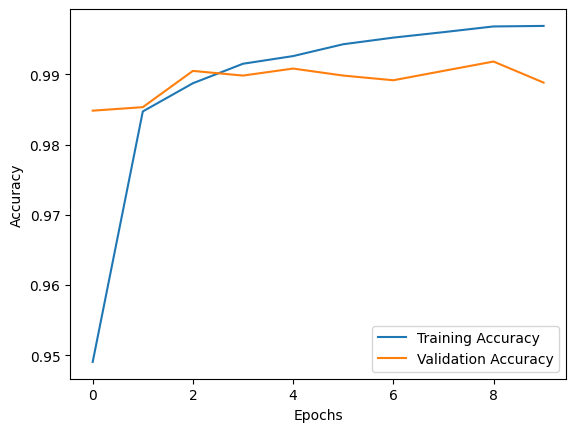

In [15]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


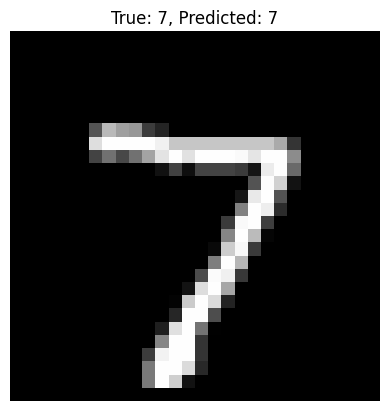

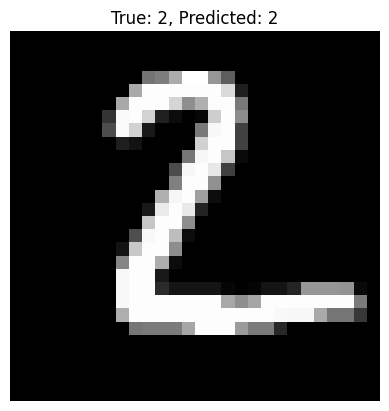

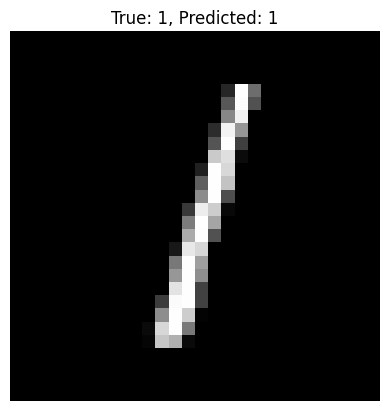

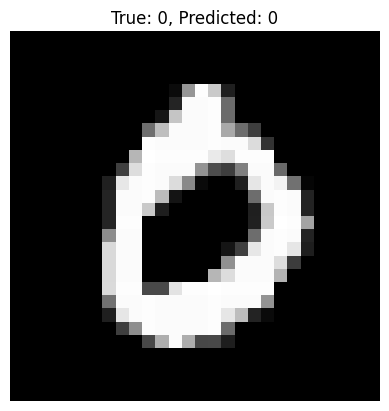

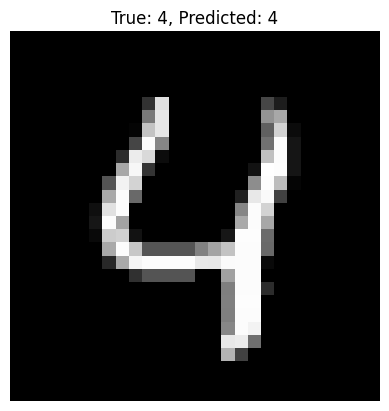

In [16]:
import numpy as np

# Make predictions
predictions = model.predict(test_images)

# Plot some test images with predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
